In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

(ds_train, ds_test), ds_info = tfds.load("fashion_mnist", split=["train", "test"],
                                         as_supervised=True, shuffle_files=True,
                                         with_info=True)


(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(*train_images.shape, 1)
test_images = test_images.reshape(*test_images.shape, 1)

ds_train = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
ds_test = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

input_shape = next(iter(ds_train))[0].shape
num_classes = 10
BATCH_SIZE = 128
ds_train = ds_train.batch(BATCH_SIZE)
ds_test = ds_test.batch(BATCH_SIZE)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteQ66XDL/fashion_mnist-train.tfrecord


  0%|          | 0/60000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteQ66XDL/fashion_mnist-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.
11501568/11490434 [==============================] - 1s 0us/step


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 784)             

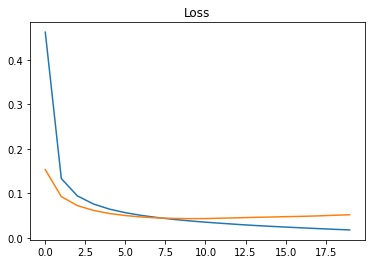

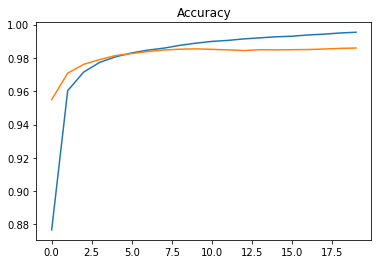

In [ ]:
model = Sequential()
model.add(Rescaling(scale=1./255, input_shape=input_shape))
model.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", activation="relu", input_shape=input_shape))
model.add(MaxPool2D())
model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(num_classes, activation="softmax"))
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=["acc"])
history = model.fit(ds_train, epochs=20, validation_data=ds_test)

def plot(history):
    acc=history.history['acc']
    val_acc=history.history['val_acc']
    loss= history.history['loss']
    val_loss=history.history['val_loss']
    epochs=range(len(acc))
    plt.plot(epochs,loss)
    plt.plot(epochs,val_loss)
    plt.title("Loss")
    plt.figure()
    plt.plot(epochs,acc)
    plt.plot(epochs,val_acc)
    plt.title("Accuracy")
    plt.show()

plot(history)

In [ ]:
model.save('fashion_mnist.h5')